In [1]:
# !pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Đọc dữ liệu

In [3]:
df = pd.read_csv('output/data.csv')
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,China,203334,2680,4776,51,169380,2982,29178,274,141,...,160000000,111163,1439323776,Asia,7079,301366,9,2.0,0.04,20.0
1,USA,82747175,38858,1018718,186,80506860,41509,1221597,1415,247359,...,1001729381,2994507,334522343,North America,4,328,0,116.0,0.60,3652.0
2,India,43062097,2011,522223,0,42523311,1970,16563,698,30658,...,834717702,594272,1404606308,Asia,33,2690,2,1.0,0.00,12.0
3,Brazil,30355919,6456,662777,76,29411813,27459,281329,8318,140994,...,63776166,296221,215299307,South America,7,325,3,30.0,0.40,1307.0
4,France,28317915,13984,145257,197,26083461,202981,2089197,1677,432101,...,266484045,4066260,65535419,Europe,2,451,0,213.0,3.00,31879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,MS Zaandam,9,0,2,0,7,0,0,0,0,...,0,0,0,NaN,0,0,0,0.0,0.00,0.0
224,Niue,8,0,0,0,7,0,1,0,4860,...,0,0,1646,Australia/Oceania,206,0,0,0.0,0.00,608.0
225,Micronesia,3,2,0,0,1,0,2,0,26,...,0,0,117209,Australia/Oceania,39070,0,0,17.0,0.00,17.0
226,Nauru,3,0,0,0,3,0,0,0,274,...,0,0,10947,Australia/Oceania,3649,0,0,0.0,0.00,0.0


## 7. Mối tương quan giữa ca nhiễm mới, ca tử vong mới và ca hồi phục mới

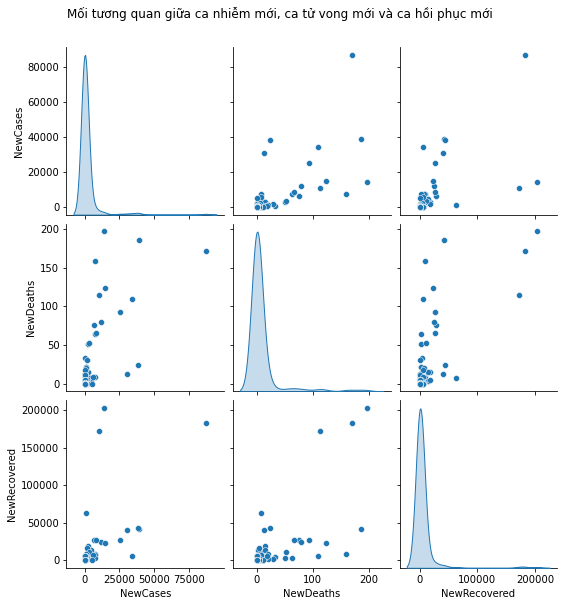

In [4]:
g = sns.pairplot(df[['NewCases', 'NewDeaths', 'NewRecovered']], diag_kind = 'kde')
g.fig.suptitle('Mối tương quan giữa ca nhiễm mới, ca tử vong mới và ca hồi phục mới', y = 1.05)
g.fig.set_size_inches(8, 8)

## x. Mức độ lây nhiễm của các ca nhiễm trên toàn thế giới

<AxesSubplot:title={'center':'Mức độ lây nhiễm của các ca nhiễm trên toàn thế giới'}>

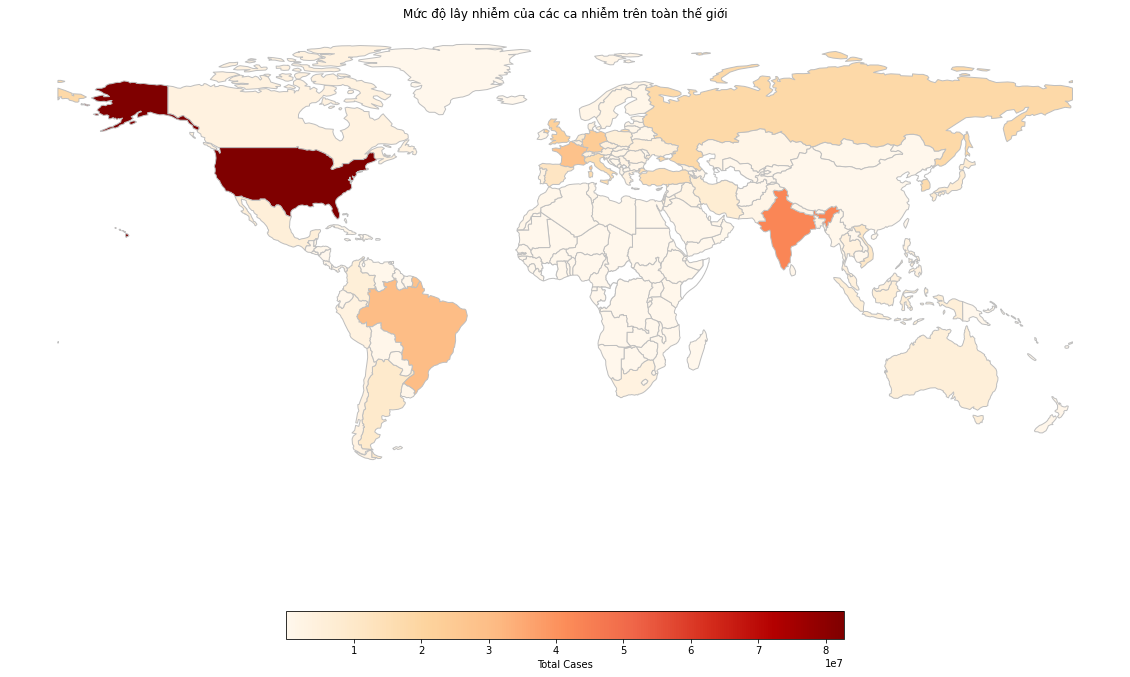

In [5]:
# tên viết tắt của các nước
alternative_name = pd.Series({'W. Sahara': 'Western Sahara',
                    'USA': 'United States of America',
                    'S. Korea': 'South Korea',
                    'Dem. Rep. Congo': 'Congo',
                    'Dominican Rep.': 'Dominican Republic',
                    'Falkland Is.': 'Falkland Islands',
                    'Fr. S. Antarctic Lands': 'French Southern and Antarctic Lands',
                    'Central African Rep.': 'Central African Republic',
                    'Eq. Guinea': 'Equatorial Guinea', 
                    'eSwatini': 'Eswatini',
                    'UAE': 'United Arab Emirates',
                    'N. Korea': 'North Korea',
                    'Solomon Is.': 'Solomon Islands',
                    'UK': 'United Kingdom',
                    'N. Cyprus': 'Nothern Cyprus',
                    'Somaliland': 'Somalia',
                    'Bosnia and Herz.': 'Bosnia and Herzegovina',
                    'Macedonia': 'North Macedonia',
                    'S. Sudan': 'South Sudan'})

# hàm thay thế tên viết tắt của các quốc gia
def change_alternative_name(name):
    if name in alternative_name.index:
        return alternative_name[name]
    elif name in alternative_name.values:
        return alternative_name[alternative_name == name].index[0]
    return name

TotalCases_df = df[['Country,Other', 'TotalCases']]
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world = df_world[(df_world.name != "Antarctica") & (df_world.name != "Fr. S. Antarctic Lands")]
df_world['name'] = df_world['name'].apply(change_alternative_name)
df_full_world = df_world.merge(TotalCases_df, left_on = 'name', right_on = 'Country,Other', how = 'left')

# vẽ biểu đồ
fig, ax = plt.subplots(1, figsize = (20, 16))
ax.axis('off')
ax.set_title('Mức độ lây nhiễm của các ca nhiễm trên toàn thế giới')
df_full_world.plot(column = 'TotalCases', cmap = 'OrRd', edgecolor = '0.75', ax = ax, 
                   legend = True, legend_kwds = {"label": "Total Cases", "orientation" : "horizontal", "shrink": 0.5}, 
                   missing_kwds = {"color": "white"})

## xx. So sánh giữa số người đã test và chưa test COVID-19 của một vài quốc gia

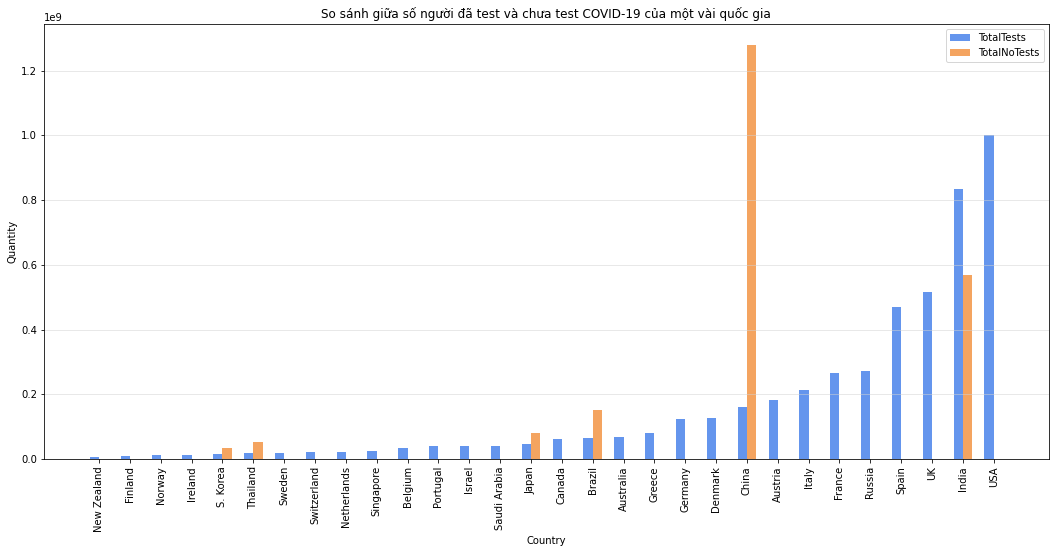

In [6]:
# các nước nổi bật
countries = ['Canada', 'Japan', 'Germany', 'Switzerland', 'Australia', 'USA', 'New Zealand', 'UK', 'Sweden', 'Netherlands', 
             'France', 'Denmark', 'Norway', 'Singapore', 'S. Korea', 'Italy', 'China', 'Finland', 'Spain', 'Belgium', 
             'Austria', 'Saudi Arabia', 'Ireland', 'Russia', 'India', 'Brazil', 'Greece', 'Thailand', 'Portugal', 'Israel']

# chuẩn bị dữ liệu
TotalNoTests_df = (df['Population'] - df['TotalTests']).apply(lambda x: 0 if x < 0 else x)
ActiveCases_RecoveredCases_df = pd.DataFrame({'Country,Other': df['Country,Other'], 
                                              'TotalTests': df['TotalTests'], 
                                              'TotalNoTests': TotalNoTests_df,
                                              'Tests/1M pop': df['Tests/1M pop']}).set_index('Country,Other')
ActiveCases_RecoveredCases_df = ActiveCases_RecoveredCases_df.loc[countries].sort_values(by = ['TotalTests'])

# vẽ biểu đồ
fig, ax = plt.subplots(1, figsize = (18, 8))
x = np.arange(len(countries))
plt.bar(x - 0.15, ActiveCases_RecoveredCases_df['TotalTests'].values, color = 'cornflowerblue', width = 0.3)
plt.bar(x + 0.15, ActiveCases_RecoveredCases_df['TotalNoTests'].values, color = 'sandybrown', width = 0.3)
plt.grid(color = 'lightgray', linewidth = 1, axis = 'y', alpha = 0.5)
plt.xticks(rotation = 90)
plt.xticks(x, ActiveCases_RecoveredCases_df.index)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.legend(ActiveCases_RecoveredCases_df.columns)
plt.title('So sánh giữa số người đã test và chưa test COVID-19 của một vài quốc gia')
plt.show()

## xxx. So sánh tỉ lệ giữa số người đã bị nhiễm, được chữa trị và số người chết vì COVID-19 của một vài quốc gia

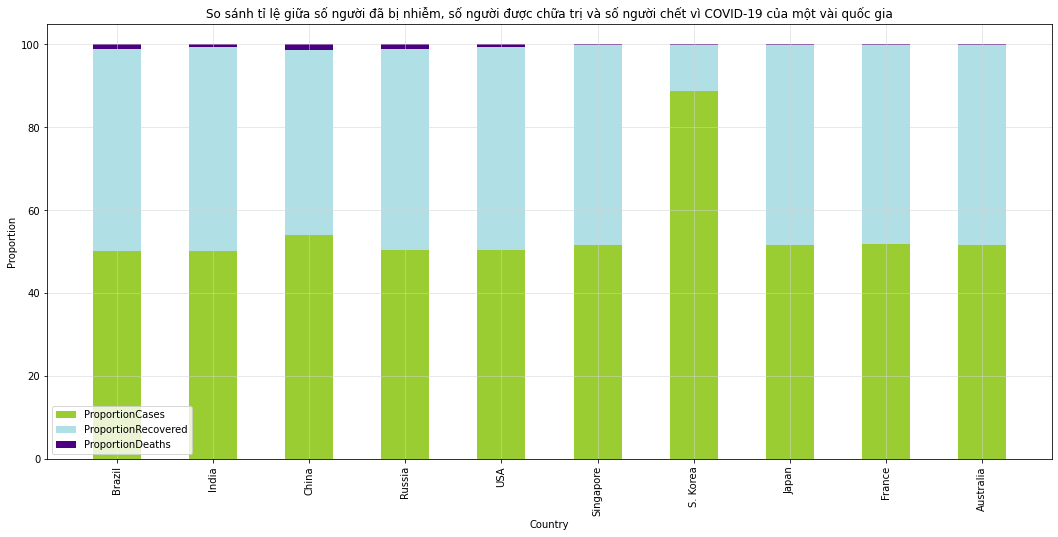

In [7]:
# các nước nổi bật
countries = ['Brazil', 'India', 'China', 'Russia', 'USA', 'Singapore', 'S. Korea', 'Japan', 'France', 'Australia']

# chuẩn bị dữ liệu
TotalSum = df['TotalCases'] + df['TotalRecovered'] + df['TotalDeaths']
Cases_Recovered_Deaths_df = pd.DataFrame({'Country,Other': df['Country,Other'],
                                          'ProportionCases': df['TotalCases'] * 100 / TotalSum,
                                          'ProportionRecovered': df['TotalRecovered'] * 100 / TotalSum,
                                          'ProportionDeaths': df['TotalDeaths'] * 100 / TotalSum}).set_index('Country,Other')
Cases_Recovered_Deaths_df = Cases_Recovered_Deaths_df.loc[countries]

# vẽ biểu đồ
fig, ax = plt.subplots(1, figsize = (18, 8))
y1 = Cases_Recovered_Deaths_df['ProportionCases'].values
y2 = Cases_Recovered_Deaths_df['ProportionRecovered'].values
y3 = Cases_Recovered_Deaths_df['ProportionDeaths'].values
plt.bar(Cases_Recovered_Deaths_df.index, y1, color = 'yellowgreen', width = 0.5)
plt.bar(Cases_Recovered_Deaths_df.index, y2, bottom = y1, color = 'powderblue', width = 0.5)
plt.bar(Cases_Recovered_Deaths_df.index, y3, bottom = y1 + y2, color = 'indigo', width = 0.5)
plt.grid(color = 'lightgray', linewidth = 1, axis = 'both', alpha = 0.5)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(Cases_Recovered_Deaths_df.columns)
plt.title('So sánh tỉ lệ giữa số người đã bị nhiễm, số người được chữa trị và số người chết vì COVID-19 của một vài quốc gia')
plt.show()

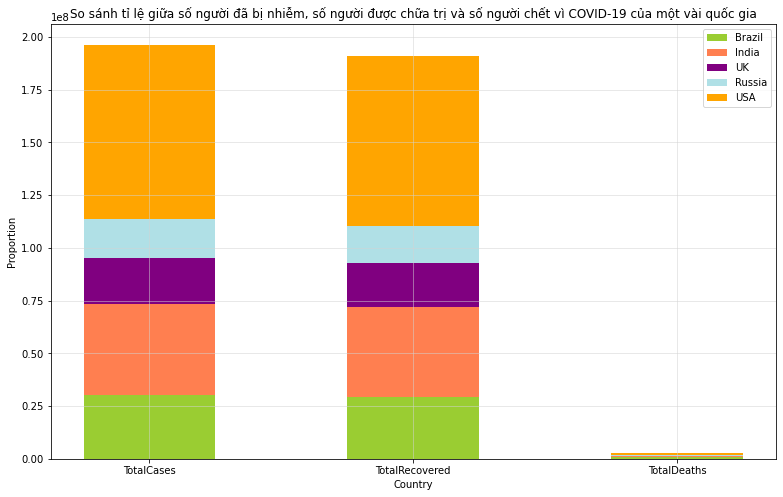

In [9]:
# 5 quốc gia nổi bật
countries = ['Brazil', 'India', 'UK', 'Russia', 'USA']

# chuẩn bị dữ liệu
Coronavirus_df = df[['Country,Other', 'TotalCases', 'TotalRecovered', 'TotalDeaths']].set_index('Country,Other').loc[countries].T

# vẽ biểu đồ
fig, ax = plt.subplots(1, figsize = (13, 8))
y1 = Coronavirus_df['Brazil'].values
y2 = Coronavirus_df['India'].values
y3 = Coronavirus_df['UK'].values
y4 = Coronavirus_df['Russia'].values
y5 = Coronavirus_df['USA'].values
plt.bar(Coronavirus_df.index, y1, color = 'yellowgreen', width = 0.5)
plt.bar(Coronavirus_df.index, y2, bottom = y1, color = 'coral', width = 0.5)
plt.bar(Coronavirus_df.index, y3, bottom = y1 + y2, color = 'purple', width = 0.5)
plt.bar(Coronavirus_df.index, y4, bottom = y1 + y2 + y3, color = 'powderblue', width = 0.5)
plt.bar(Coronavirus_df.index, y5, bottom = y1 + y2 + y3 + y4, color = 'orange', width = 0.5)
plt.grid(color = 'lightgray', linewidth = 1, axis = 'both', alpha = 0.5)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(Coronavirus_df.columns)
plt.title('So sánh tỉ lệ giữa số người đã bị nhiễm, số người được chữa trị và số người chết vì COVID-19 của một vài quốc gia')
plt.show()